In [1]:
# 기본적인 패키지 import

import numpy as np 
import pandas as pd 
import scipy as sp

import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글, 마이너스 부호 깨짐 방지
from matplotlib import rc
import matplotlib.font_manager as fm 

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### MNIST 다운로드

In [3]:
from tensorflow import keras 
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
# MNIST 이미지 표현을 위한 함수
def show_images(dataset, label, nrow, ncol):
    # 캔버스 설정
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(2*ncol, 2*nrow))
    ax = axes.ravel()

    xlabels = label[0:nrow*ncol]

    for i in range(nrow*ncol):
        image = dataset[i]
        ax[i].imshow(image, cmap='gray_r')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_xlabel(xlabels[i])

    plt.tight_layout()
    plt.show()


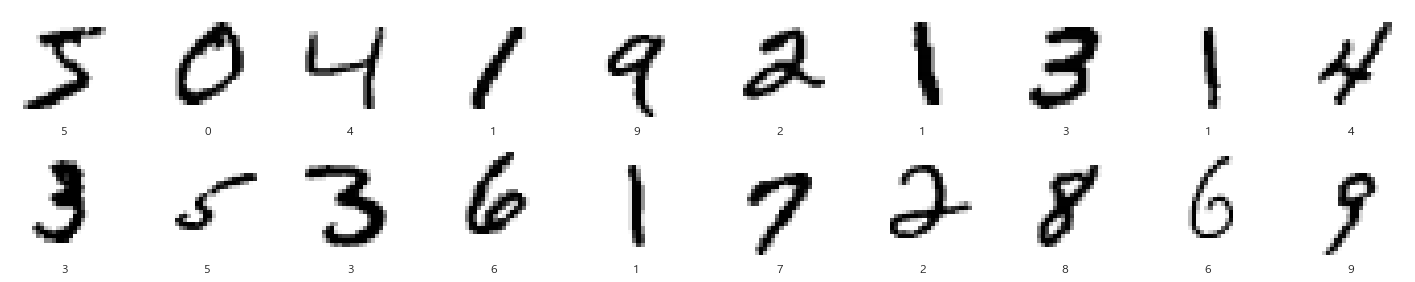

In [8]:
show_images(train_input, train_target, 2, 10)

In [10]:
model = keras.Sequential(name='ANN')
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(1000, activation='relu', name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

model.summary()

Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 1000)              785000    
                                                                 
 output (Dense)              (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 255.0으로 나눠 0~1 사이 값으로 축소하기 안함 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_ann_model.h5')

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_input, train_target, epochs=20, verbose=1, validation_data=(test_input, test_target), batch_size=100, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
600/600 [==============================] - 5s 7ms/step - loss: 4.4048 - accuracy: 0.9149 - val_loss: 0.7871 - val_accuracy: 0.9412
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.3880 - accuracy: 0.9600 - val_loss: 0.4377 - val_accuracy: 0.9549
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.2291 - accuracy: 0.9691 - val_loss: 0.4475 - val_accuracy: 0.9546
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.2013 - accuracy: 0.9703 - val_loss: 0.4152 - val_accuracy: 0.9567
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.2275 - accuracy: 0.9719 - val_loss: 0.5096 - val_accuracy: 0.9562
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.2297 - accuracy: 0.9699 - val_loss: 0.4145 - val_accuracy: 0.9592
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.2475 - accuracy: 0.9706 - val_loss: 0.4114 - val_accuracy: 0.9555
Epoch 

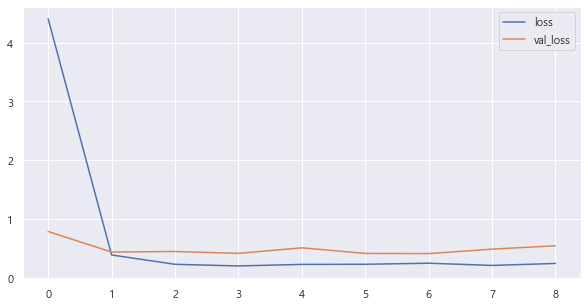

In [14]:
plot_target = ['loss', 'val_loss']
plt.figure(figsize=(10,5))

for each in plot_target:
    plt.plot(history.history[each], label=each)
plt.legend()
plt.show()

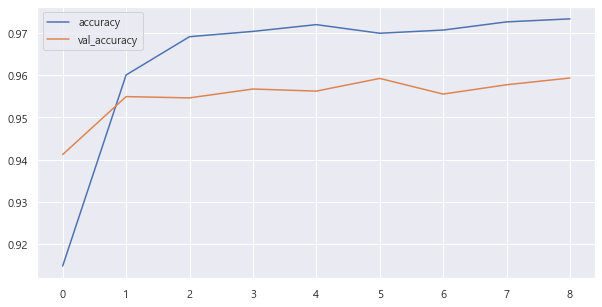

In [15]:
plot_target = ['accuracy', 'val_accuracy']
plt.figure(figsize=(10,5))

for each in plot_target:
    plt.plot(history.history[each], label=each)
plt.legend()
plt.show()

In [16]:
model.evaluate(test_input, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.4114 - accuracy: 0.9555


[0.4113560914993286, 0.9555000066757202]

In [17]:
# 예측된 결과값 리스트로 만들기
pred_result = model.predict(test_input)

313/313 [==============================] - 1s 2ms/step


In [18]:
pred_labels = np.argmax(pred_result, axis=-1)
pred_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 4], dtype=int64)

##### 예측 실패한 이미지 파악

In [19]:
wrong_result = []

for i in range(0, len(test_target)):
    if pred_labels[i] != test_target[i]:
        wrong_result.append(i)

len(wrong_result)

445

In [21]:
import random

samples = random.choices(population=wrong_result, k=16)
len(samples)

16

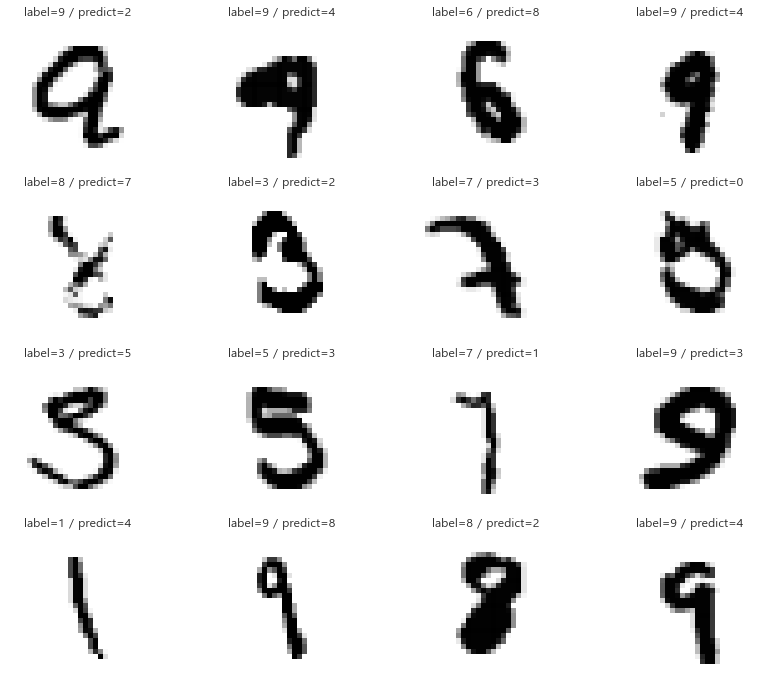

In [24]:
# 예측 실패한 이미지 확인
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(test_input[n].reshape(28,28), cmap='gray_r', interpolation='nearest')
    plt.title(f'label={test_target[n]} / predict={pred_labels[n]}')
    plt.axis('off')

plt.show()